Define variables for computation and import packages

In [48]:
SYMBOL="TSLA"
COMPANY="tesla"
NEWSAPI_TOKEN = '8a15b13e21a844aa8ea71080ce103e13'


import requests
import yfinance as yf
import pandas as pd
from transformers import pipeline
from collections import defaultdict
import matplotlib.pyplot as plt

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Fetch the news from an api for this given company

In [5]:
res = requests.get(f'https://newsapi.org/v2/everything?q={COMPANY}&language=en&sortBy=publishedAt&apiKey={NEWSAPI_TOKEN}').json()
news = res['articles']

news

[{'source': {'id': None, 'name': 'GlobeNewswire'},
  'author': 'Research and Markets',
  'title': 'Europe Emerges as a Fast-Growing Hub for Usage-Based Insurance, Backed by Strong Regulatory Support and Telematics Infrastructure',
  'description': 'Dublin, Oct. 26, 2023 (GLOBE NEWSWIRE) -- The "Global Usage-based Insurance Market for ICE & Electric Vehicle, by Package (PAYD, PHYD, MHYD), Technology (OBD-II, Embedded Telematics Box, Smartphone), Vehicle (New, Old), Device Offering (BYOD, Company Provided…',
  'url': 'https://www.globenewswire.com/news-release/2023/10/26/2767372/28124/en/Europe-Emerges-as-a-Fast-Growing-Hub-for-Usage-Based-Insurance-Backed-by-Strong-Regulatory-Support-and-Telematics-Infrastructure.html',
  'urlToImage': 'https://ml.globenewswire.com/Resource/Download/908fb457-7f8e-4a08-9081-5565e3dfb3d7',
  'publishedAt': '2023-10-26T11:13:00Z',
  'content': 'Dublin, Oct. 26, 2023 (GLOBE NEWSWIRE) -- The "Global Usage-based Insurance Market for ICE &amp; Electric Vehicle

Now fetch stock data

In [32]:
tsla = yf.Ticker(SYMBOL)

price_history = tsla.history(period="1mo")

print(price_history)

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-27 00:00:00-04:00  244.259995  245.330002  234.580002  240.500000   
2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   
2023-10-02 00:00:00-04:00  244.809998  254.279999  242.619995  251.600006   
2023-10-03 00:00:00-04:00  248.610001  250.020004  244.449997  246.529999   
2023-10-04 00:00:00-04:00  248.139999  261.859985  247.600006  261.160004   
2023-10-05 00:00:00-04:00  260.000000  263.600006  256.250000  260.049988   
2023-10-06 00:00:00-04:00  253.979996  261.649994  250.649994  260.529999   
2023-10-09 00:00:00-04:00  255.309998  261.359985  252.050003  259.670013   
2023-10-10 00:00:00-04:00  257.750000  268.940002  257.649994  263.619995   
2023-10-11 00:00:00-04:00  266.200012  268.600006  260.899994  262.989990   

Now, we can process this and get the sentiment for all articles

In [26]:
sentiment_per_day = {}

# sort per day
groups = defaultdict(list)

for obj in news:
  groups[obj['publishedAt']].append(obj)
  
grouped_news = groups.values()

for group in grouped_news:
  score = 0
  date = group[0]['publishedAt']
  
  for article in group:
    # st = sentiment_pipeline(article['title'])[0]['label']
    sc = sentiment_pipeline(article['content'])[0]
    if sc['label'] == 'POSITIVE':
      score += sc['score']
    else:
      score -= sc['score']
      
  print(f'{date} {score} {"positive" if score > 0 else "negative"}')
  sentiment_per_day[date] = score

2023-10-26T11:13:00Z 0.6002781987190247 positive
2023-10-26T11:06:15Z -0.9786980748176575 negative
2023-10-26T11:06:00Z -0.9957043528556824 negative
2023-10-26T11:00:00Z -0.9752808213233948 negative
2023-10-26T10:57:19Z -0.9996683597564697 negative
2023-10-26T10:50:11Z -0.9994819760322571 negative
2023-10-26T10:39:42Z -0.9996992349624634 negative
2023-10-26T10:30:11Z -0.5548760890960693 negative
2023-10-26T10:08:05Z -0.983125627040863 negative
2023-10-26T10:02:08Z 0.9997979998588562 positive
2023-10-26T10:00:21Z 0.9998169541358948 positive
2023-10-26T10:00:00Z 2.941916584968567 positive
2023-10-26T09:57:02Z 0.9990482926368713 positive
2023-10-26T09:56:05Z -0.9746736884117126 negative
2023-10-26T09:47:01Z -0.9953696131706238 negative
2023-10-26T09:41:38Z -0.9997597336769104 negative
2023-10-26T09:28:03Z -0.9994710087776184 negative
2023-10-26T09:22:58Z -0.9986869692802429 negative
2023-10-26T09:22:14Z -0.7336785793304443 negative
2023-10-26T09:04:07Z -0.8294434547424316 negative
2023-10

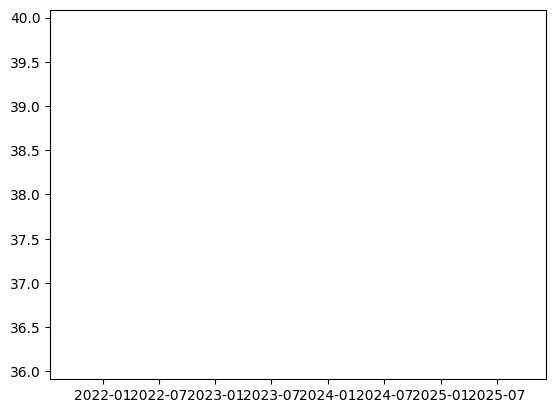

In [61]:
from numpy.random import randint

closing = price_history.get('Close')
dates = closing.index.to_pydatetime() 

first_day = dates[0]
last_day = dates[:1][0]

# trange = pd.date_range(first_day.strftime("%d/%m/%Y"), last_day.strftime("%d/%m/%Y"), freq='D')
trange = pd.date_range(first_day, last_day, freq='D')

df = pd.DataFrame({'Huts' : randint(1, 50, len(trange))}, index=trange)

fig, ax = plt.subplots()

ax.plot('Huts', data=df)